# Rifaccio es dell'iris

## Analisi Dataset

### Importo librerie

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

import scipy.stats as stats

### Importo il dataset

In [28]:
DATAPATH = './data/iris_dataset.csv'


In [29]:
#creo il dataframe panda 
data= pd.read_csv(DATAPATH)

#controllo il dataframe appena creato 
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Inizio analisi del dataset

In [30]:
data.shape

(150, 5)

### Controllo NaN values



In [31]:
print('Ci sono valori nulli nel Dataset? {}'.format(data.isnull().any().any()))

Ci sono valori nulli nel Dataset? True


In [32]:
#Dato che ci sono valori nulli voglio trovare in che colonne si trovano 
print('colonne: /n {}'.format(data.isnull().any(axis=0
)))

colonne: /n sepal_length_cm    False
sepal_width_cm     False
petal_length_cm    False
petal_width_cm      True
classe             False
dtype: bool


In [33]:
#Sostituisco i valori nulli 
from pandas.api.types import is_numeric_dtype
data = data.apply(lambda x: x.fillna(x.median()) if is_numeric_dtype(x) else x.fillna(x.mode().iloc[0]))

data['petal_width_cm'].unique()

array([0.2, 0.4, 0.3, 1.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [34]:
#cerco altri possibili errori 
data.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.238667,NaN
std,1.312781,0.433123,1.764420,0.742369,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


> noto che ci sono 5 classi uniche ma da specific ne dovrei avere solo 3



In [35]:
data['classe'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

vedo che ci sono delle classi con errori di inserimento quindi sostituisco con il valore giusto 

In [36]:
data=data.replace('Iris-setossa','Iris-setosa')
data = data.replace('versicolor', 'Iris-versicolor')

data.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.238667,NaN
std,1.312781,0.433123,1.764420,0.742369,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


> Ora si vede che le classi uniche sono 3, come da specifica


### Graphs Analysis

<AxesSubplot:xlabel='sepal_width_cm'>

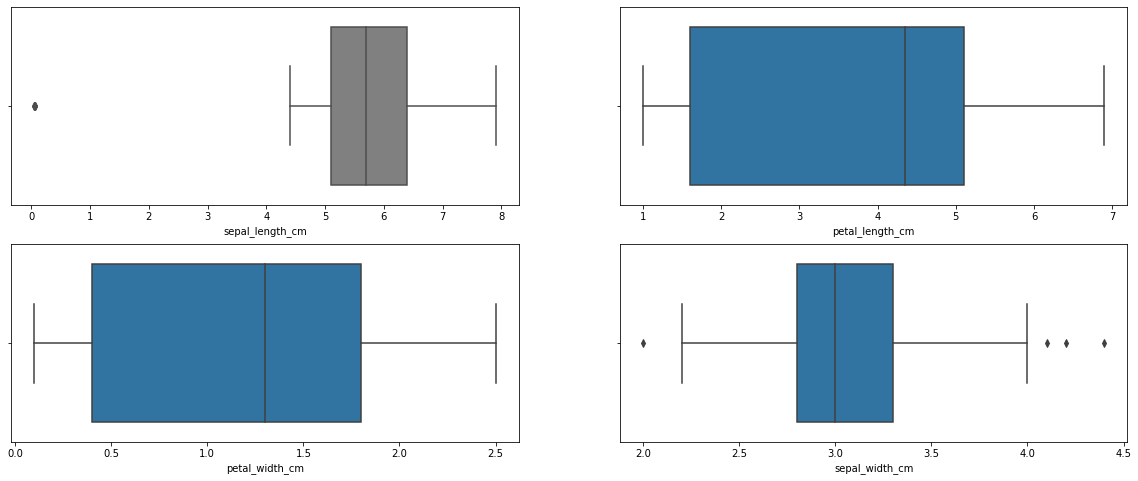

In [37]:
fig,axs= plt.subplots(2,2,figsize=(20,8))
sns.boxplot(x=data.sepal_length_cm,color='#808080',ax=axs[0,0])
sns.boxplot(x=data.petal_length_cm,ax=axs[0,1])
sns.boxplot(x=data.petal_width_cm,ax=axs[1,0])
sns.boxplot(x=data.sepal_width_cm,ax=axs[1,1])

>Già da questo grafico vedo che sia sepal_lenght chesepal_width hanno outliers

<AxesSubplot:xlabel='petal_length_cm', ylabel='classe'>

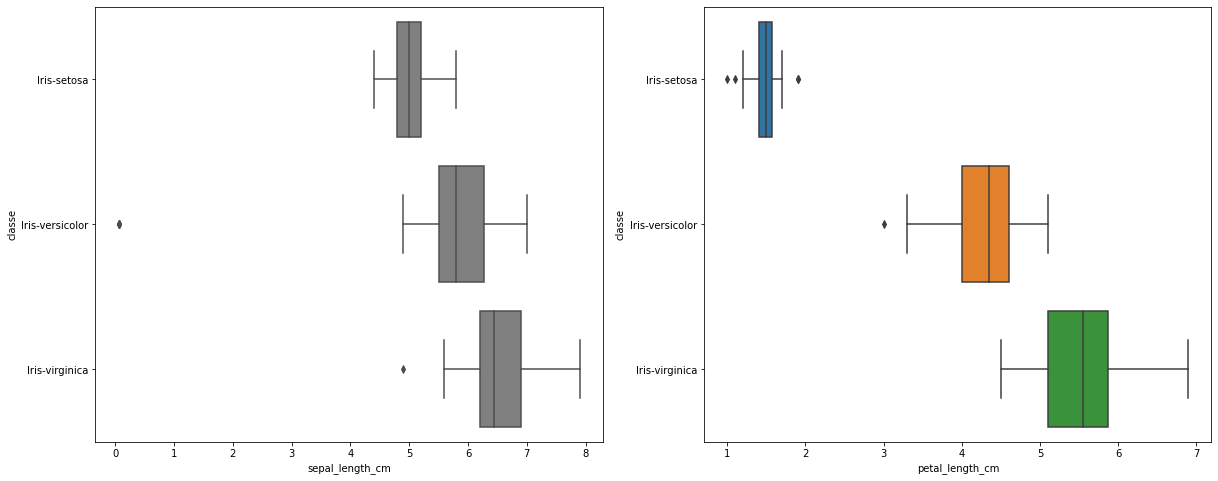

In [38]:
# Faccio Un grafico di relazione di questi valori per le tre classi
fig,axs= plt.subplots(1,2,figsize=(20,8))
sns.boxplot(x=data.sepal_length_cm,y=data.classe,color='#808080',ax=axs[0])
sns.boxplot(x=data.petal_length_cm,y=data.classe, ax=axs[1])


### Correzione degli outliers

In [39]:
_=stats.mstats.winsorize(data.petal_length_cm,limits=0.05,inplace=True)
_=stats.mstats.winsorize(data.petal_width_cm,limits=0.05,inplace=True)

<AxesSubplot:xlabel='petal_length_cm', ylabel='classe'>

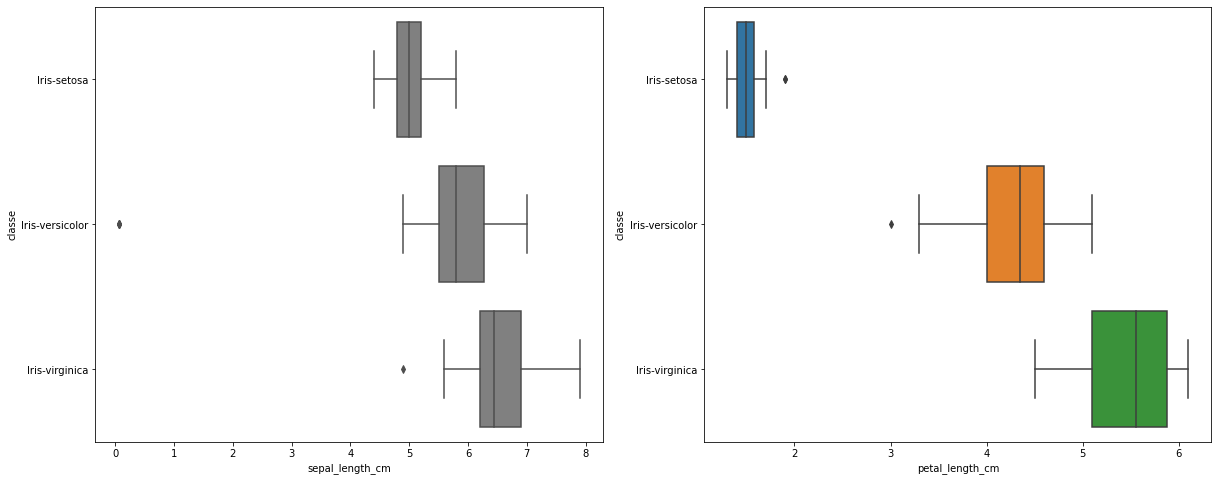

In [40]:
# rifaccio i grafici per vedere se ho risolto gli outliers
fig,axs= plt.subplots(1,2,figsize=(20,8))
sns.boxplot(x=data.sepal_length_cm,y=data.classe,color='#808080',ax=axs[0])
sns.boxplot(x=data.petal_length_cm,y=data.classe, ax=axs[1])

> Noto che ho ancora delgli outliers, Apllico quindi una trasformazione logaritmica

In [41]:
data.petal_length_cm=data.petal_length_cm.apply(np.log)
data.sepal_length_cm=data.sepal_length_cm.apply(np.log)

## Training & Test

### Libraries

In [42]:
from sklearn.metrics import SCORERS
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.externals import joblib

### Split


In [43]:
#feature dataset
X=data.iloc[:,:-1]
X.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,1.629241,3.5,0.336472,0.2
1,1.589235,3.0,0.336472,0.2
2,1.547563,3.2,0.262364,0.2
3,1.526056,3.1,0.405465,0.2
4,1.609438,3.6,0.336472,0.2


In [44]:

#result
y=data.classe
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: classe, dtype: object

In [45]:
y = y.map(lambda x: 1 if x=='Iris-setosa'  else (2 if x=='Iris-versicolor' else 0))
y

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: classe, Length: 150, dtype: int64

#### One_hot encoding y


In [46]:
##categorical_features = [col for col in data.columns if not is_numeric_dtype(data[col]) ]
#print(categorical_features)
#data_with_dummies = pd.get_dummies(data, columns = categorical_features)
#data_with_dummies.head()


In [47]:
#y= data_with_dummies.iloc[:,-3:]
#y.head()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y)

### Model

In [49]:
def evaluate(true_values,predicted_values):
    print("Accuracy {:.3f}".format(accuracy_score(true_values,predicted_values)))
    print("Area under ROC curve {:.3f}".format(roc_auc_score(true_values,predicted_values,multi_class='ovo')))

In [50]:
model_and_iperparameters= {'Logistic Regression': (LogisticRegression(solver='liblinear'), 
                                                 {'C': [0.01,0.05,0.1,0.5,1,2]})
                          }

In [51]:
k_fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=30)
model= model_and_iperparameters['Logistic Regression'][0]
iperparam= model_and_iperparameters['Logistic Regression'][1]


In [60]:
gs=GridSearchCV(estimator=model,param_grid=iperparam,scoring='accuracy',cv=k_fold,verbose=True, return_train_score=True)
gs.fit(X_train,y_train)
pd.DataFrame(gs.cv_results_)

predict_sample = np.array([5 ,4, 1, 0])
gs.predict(predict_sample)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


c:\Users\lucar\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[5 4 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print("Best Iperparameter: {}".format(gs.best_params_))
print("Best accuracy score: {}".format(gs.best_score_))
print()
# 3. Assess the quality of predictions made on the test set
print("Evaluate Performance on Test Set")
metrics.accuracy_score(y_test,gs.predict(X_test))
evaluate(y_test,gs.predict(X_test))